### Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

### Read csv file that has Customer churn data

In [2]:
data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Cleaning

#### Update column names to lower-case to avoid typos

In [3]:
data.columns = data.columns.str.lower()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


#### Convert data type of "seniorcitizen" column to object
- As senior citizen column holds categorical value like 1 for yes and 0 for no, lets convert into object for analysis
- This will later be encoded while building model

In [5]:
data['seniorcitizen'] = data['seniorcitizen'].map({1:'Yes', 0:'No'})

#### Convert data type of "totalcharges" column to float

In [6]:
data['totalcharges'] = pd.to_numeric(data['totalcharges'].str.strip(),
                                    errors='coerce')

#### Check for null or missing values

In [7]:
data.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

#### Handle null values
- There are only 11 null values which is less than 1% of overall data
- Dropping these rows will not create any significant difference

In [8]:
data.dropna(inplace=True)

In [9]:
data.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

#### Check for duplicate values

In [10]:
data.duplicated().sum()

0

#### Dropping "customerid" column as it has no impact on the analysis

In [11]:
data.drop(columns='customerid', axis=1, inplace=True)

### Exploratory Data Analysis

#### Get categorical columns

In [12]:
cat_cols = [col for col in data.select_dtypes(include='object').columns]
cat_cols.remove('churn')
cat_cols

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

#### Plot bar graphs for categorical columns

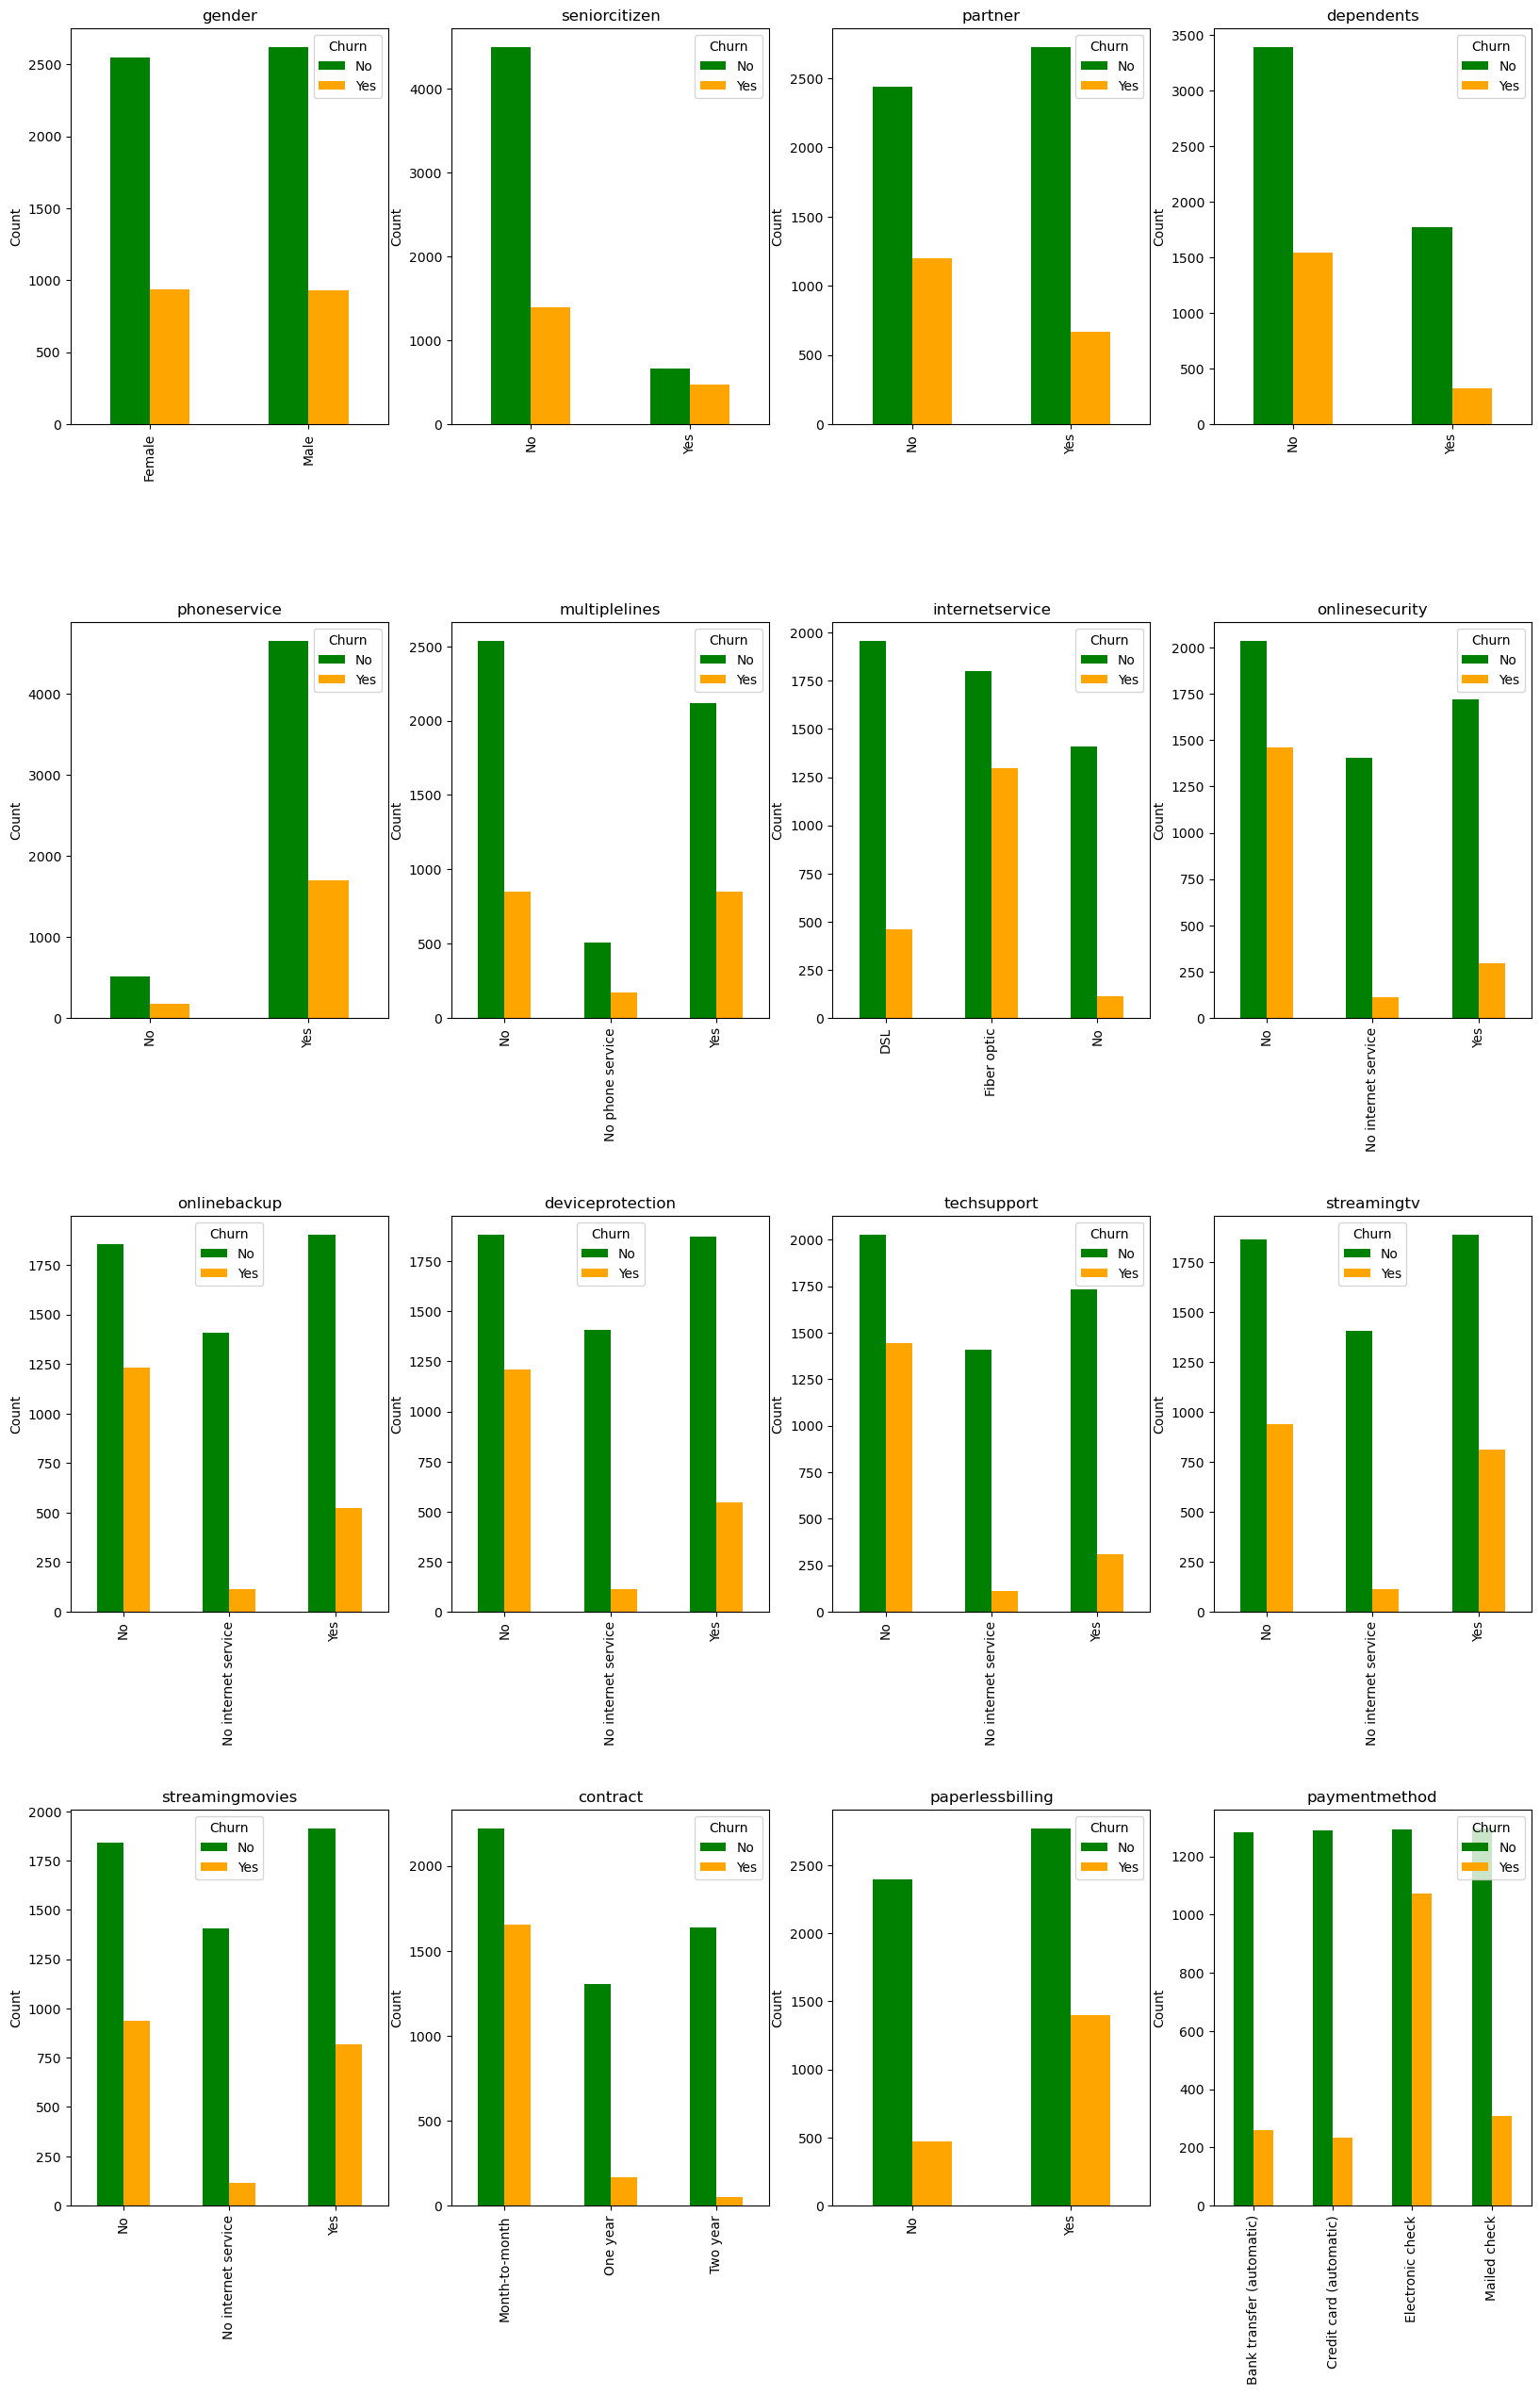

In [13]:
fig, axes = plt.subplots(4,4, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    pd.crosstab(data[col], data['churn']).plot(kind='bar', stacked=False, 
                                           ax=ax, color=['green', 'orange'])
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend(title='Churn')

plt.subplots_adjust(hspace=0.5)
plt.show()

#### Insights from visual interpretation
- Gender: Both male and female have churned equally
- Senior citizen: Customers who are not senior citizens have churned more
- Partner: Customers who have not partnered have churned more
- Dependents: Customers who have no dependents have churned more
- Phone Service: Customers who have done service have churned more
- Multiple lines: Both customers having multiple lines and not having multiple lines have churned equally
- Internet Service: Customers with fiber optic have churned more
- Online Security: Customers who don't have online security have churned more
- Online Backup: Customers who don't have online backup have churned more
- Device Protection: Customers who don't have device protection have churned more
- Tech Support: Customers without tech support have churned more
- Streaming TV: Customers not streaming TV have churned more
- Streaming movies:  Customers not streaming movies have churned more
- Contract: Customers with month-to-month contract have churned more
- Paperless Billing: Customers using paperless billing have churned more
- Payment Method: Customers paying through electronic check have churned more

#### Perform Chi Squared test to confirm association with target column

In [14]:
from scipy.stats import chi2_contingency

associated_cols = []
for col in cat_cols:
    contingency_table = pd.crosstab(data[col], data['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    if p > 0.05:
        continue
    else:
        associated_cols.append(col)

print('Following columns are statistically significant:', associated_cols)

Following columns are statistically significant: ['seniorcitizen', 'partner', 'dependents', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


#### Get numerical columns

In [15]:
numeric_cols = [col for col in data.columns if col not in cat_cols]
numeric_cols.remove('churn')
numeric_cols

['tenure', 'monthlycharges', 'totalcharges']

#### Plot kernel density plot to check distribution of numerical columns

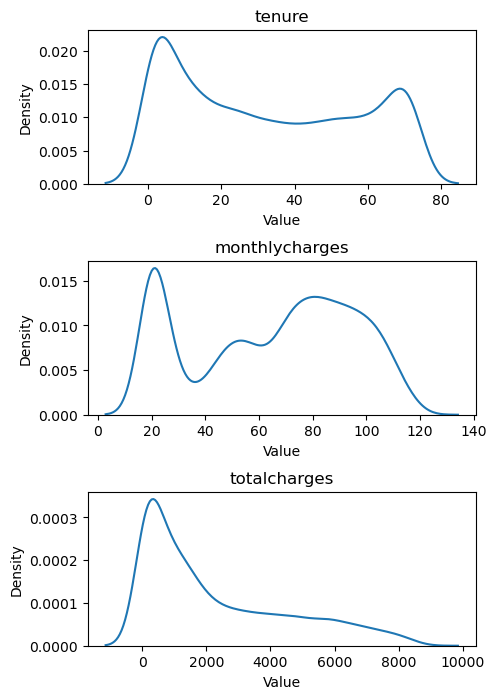

In [16]:
fig, axes = plt.subplots(3,1, figsize=(5,8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.kdeplot(data[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    
plt.subplots_adjust(hspace=0.5)    
plt.show()

#### Plot box plot for numerical columns to check outliers

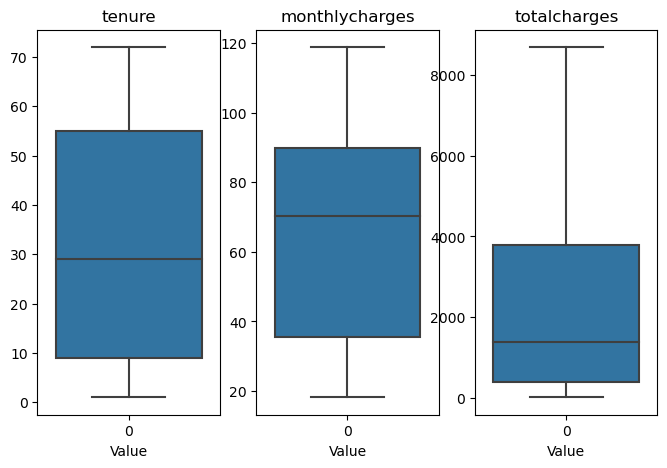

In [17]:
fig, axes = plt.subplots(1,3, figsize=(8,5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.boxplot(data[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    
plt.subplots_adjust(hspace=0.5)    
plt.show()

#### Insights from visual interpretation
- tenure and monthly charges do not have proper distribution
- total charges have a normal distribution and is right skewed
- box plot shows there are no outliers in the data

#### Perform Shapiro Wilk test to check distributions

In [18]:
from scipy.stats import shapiro

for col in numeric_cols:
    s, p = shapiro(data[col])
    
    if p>0.05:
        print(f'{col} follows Guassian distribution')
    else:
        print(f'{col} does not follow Guassian distribution')

tenure does not follow Guassian distribution
monthlycharges does not follow Guassian distribution
totalcharges does not follow Guassian distribution


### Feature Engineering

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_cols),
                                              ('cat', categorical_transformer, associated_cols)])

#### Slicing last 100 rows from dataset to validate trained model

In [21]:
columns = associated_cols + numeric_cols + ['churn']
final_test_data = data[columns].iloc[-100:]
train_data = data[columns].iloc[:-100]

X = train_data.drop('churn', axis=1)
y = train_data['churn'].map({'Yes': 1, 'No': 0})

#### Check class imbalance

In [22]:
data['churn'].value_counts()

churn
No     5163
Yes    1869
Name: count, dtype: int64

- Data is highlly imbalanced. Will be using SMOTE to resample the training data

### Model building

In [23]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline

In [24]:
models = [
    ('logistic regression', LogisticRegression()),
    ('random forest', RandomForestClassifier()),
    ('gradient boosting', GradientBoostingClassifier()),
    ('ada boosting', AdaBoostClassifier()),
    ('k-nearest neighbors', KNeighborsClassifier()),
    ('support vector classifier', SVC()),
    ('naive-bayes', GaussianNB()),
    ('extreme gradient boosting', XGBClassifier())
]

In [25]:
scoring_param = {
        'Accuracy': 'accuracy',
        'Precision': 'precision',
        'Recall': 'recall',
        'F1': 'f1'
    }

In [26]:
def print_results(results):
    results_df = pd.DataFrame(results).T.reset_index()
    results_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']
    print(results_df)
    
    best_model = results_df.loc[results_df['F1'].idxmax(), ['Model', 'F1']]
    print(f'Best performing model based on F1 score: {best_model[0]}, {best_model[1]}')

#### Baseline models

In [27]:
baseline_results = {}

for name, model in models:
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
    scores = cross_validate(pipeline, X, y, cv=skf, n_jobs=-1, 
                            scoring=scoring_param, return_train_score=False)
    
    baseline_results[name] = {
        'accuracy': round(scores['test_Accuracy'].mean(), 4),
        'precision': round(scores['test_Precision'].mean(), 4),
        'recall': round(scores['test_Recall'].mean(), 4),
        'f1': round(scores['test_F1'].mean(), 4)
    }
    
print_results(baseline_results)

                       Model  Accuracy  Precision  Recall      F1
0        logistic regression    0.8027     0.6507  0.5525  0.5975
1              random forest    0.7868     0.6278  0.4834  0.5458
2          gradient boosting    0.8029     0.6625  0.5258  0.5859
3               ada boosting    0.8041     0.6582  0.5448  0.5958
4        k-nearest neighbors    0.7675     0.5677  0.5182  0.5417
5  support vector classifier    0.8032     0.6781  0.4937  0.5709
6                naive-bayes    0.6639     0.4340  0.8766  0.5806
7  extreme gradient boosting    0.7842     0.6097  0.5204  0.5612
Best performing model based on F1 score: logistic regression, 0.5975


#### Baseline models with SMOTE

In [28]:
base_smote_results = {}

for name, model in models:
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=23)),
        ('classifier', model)
    ])
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
    scores = cross_validate(pipeline, X, y, cv=skf, n_jobs=-1, 
                             scoring=scoring_param, return_train_score=False)
    
    base_smote_results[name] = {
        'accuracy': round(scores['test_Accuracy'].mean(), 4),
        'precision': round(scores['test_Precision'].mean(), 4),
        'recall': round(scores['test_Recall'].mean(), 4),
        'f1': round(scores['test_F1'].mean(), 4)
    }
    
print_results(base_smote_results)

                       Model  Accuracy  Precision  Recall      F1
0        logistic regression    0.7504     0.5195  0.7901  0.6266
1              random forest    0.7777     0.5802  0.5873  0.5836
2          gradient boosting    0.7813     0.5723  0.6971  0.6283
3               ada boosting    0.7649     0.5407  0.7607  0.6320
4        k-nearest neighbors    0.7020     0.4605  0.7205  0.5618
5  support vector classifier    0.7571     0.5305  0.7384  0.6172
6                naive-bayes    0.6705     0.4389  0.8684  0.5831
7  extreme gradient boosting    0.7765     0.5779  0.5878  0.5826
Best performing model based on F1 score: ada boosting, 0.632


#### Baseline model with SMOTE and PCA

In [29]:
smote_pca_results = {}

for name, model in models:
    pipeline_pca = ImbPipeline(steps=[
        ('preprocessor', preprocessor),              
        ('smote', SMOTE(random_state=23)),
        ('pca', PCA()),
        ('classifier', model)
    ])
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
    scores = cross_validate(pipeline_pca, X, y, cv=skf, n_jobs=-1, 
                            scoring=scoring_param, return_train_score=False)
    
    smote_pca_results[name] = {
        'accuracy': round(scores['test_Accuracy'].mean(), 4),
        'precision': round(scores['test_Precision'].mean(), 4),
        'recall': round(scores['test_Recall'].mean(), 4),
        'f1': round(scores['test_F1'].mean(), 4)
    }
    
print_results(smote_pca_results)

                       Model  Accuracy  Precision  Recall      F1
0        logistic regression    0.7506     0.5197  0.7901  0.6268
1              random forest    0.7706     0.5649  0.5894  0.5768
2          gradient boosting    0.7615     0.5361  0.7493  0.6249
3               ada boosting    0.7569     0.5299  0.7466  0.6197
4        k-nearest neighbors    0.7020     0.4605  0.7205  0.5618
5  support vector classifier    0.7565     0.5299  0.7346  0.6155
6                naive-bayes    0.7653     0.5444  0.7194  0.6194
7  extreme gradient boosting    0.7572     0.5364  0.6259  0.5777
Best performing model based on F1 score: logistic regression, 0.6268


#### Baseline models with SMOTE and RFE

In [30]:
smote_rfe_results = {}
excep_models = ['k-nearest neighbors', 'support vector classifier', 'naive-bayes']

for name, model in models:    
    rfe_estimator = model if name not in excep_models else GradientBoostingClassifier()
    pipeline_rfe = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=23)),
        ('rfe', RFE(estimator=rfe_estimator, n_features_to_select=15)),
        ('classifier', model)
    ])
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
    scores = cross_validate(pipeline_rfe, X, y, cv=skf, n_jobs=-1, 
                            scoring=scoring_param, return_train_score=False)
    
    smote_rfe_results[name] = {
        'accuracy': round(scores['test_Accuracy'].mean(), 4),
        'precision': round(scores['test_Precision'].mean(), 4),
        'recall': round(scores['test_Recall'].mean(), 4),
        'f1': round(scores['test_F1'].mean(), 4)
    }
    
print_results(smote_rfe_results)

                       Model  Accuracy  Precision  Recall      F1
0        logistic regression    0.7500     0.5190  0.7971  0.6284
1              random forest    0.7742     0.5720  0.5927  0.5820
2          gradient boosting    0.7774     0.5644  0.7069  0.6275
3               ada boosting    0.7595     0.5334  0.7564  0.6254
4        k-nearest neighbors    0.7220     0.4839  0.6895  0.5685
5  support vector classifier    0.7581     0.5317  0.7580  0.6241
6                naive-bayes    0.7304     0.4953  0.8070  0.6137
7  extreme gradient boosting    0.7656     0.5556  0.5818  0.5683
Best performing model based on F1 score: logistic regression, 0.6284


#### Insights
- From above results, Ada boosting model with SMOTE has given best results with highest F1-score

### Hyperparameter Tuning

Accuracy: 0.7736
Precision: 0.5640
Recall: 0.7261
F1 score: 0.6349


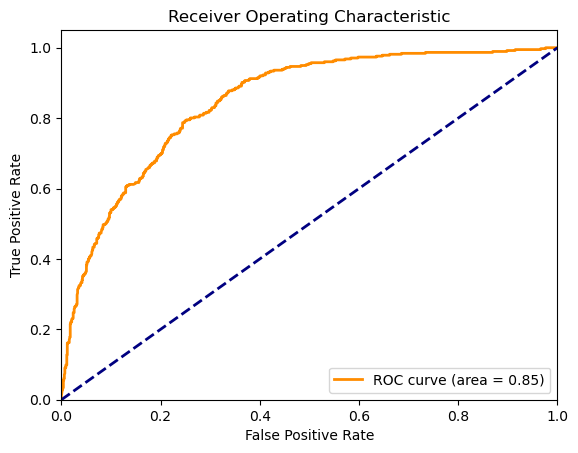

In [31]:
selected_model = AdaBoostClassifier()

param_grid_ada = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
    'classifier__algorithm': ['SAMME', 'SAMME.R']
}

pipeline_hpt = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=23)),
    ('classifier', selected_model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

grid_search = GridSearchCV(pipeline, param_grid=param_grid_ada, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

ada_boost_hpt = grid_search.best_estimator_
y_pred_hpt = ada_boost_hpt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_hpt)
precision = precision_score(y_test, y_pred_hpt)
recall = recall_score(y_test, y_pred_hpt)
f1 = f1_score(y_test, y_pred_hpt)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

y_proba_hpt = ada_boost_hpt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_hpt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Prediction with test data

In [32]:
features = final_test_data.drop(columns='churn', axis=1)
target = final_test_data['churn'].map({'Yes':1, 'No':0})

final_pred = ada_boost_hpt.predict(features)

Accuracy: 0.7400
Precision: 0.5588
Recall: 0.6333
F1 score: 0.5938


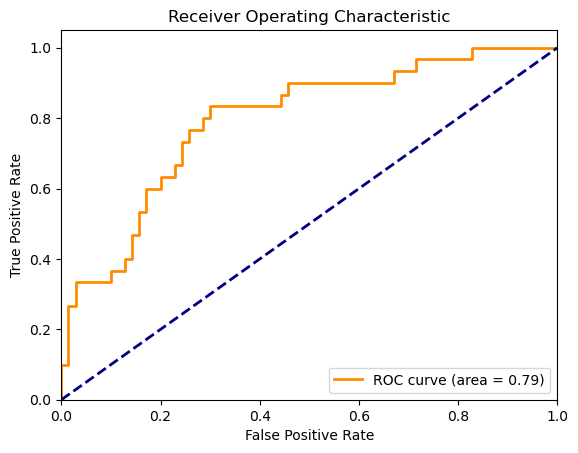

In [33]:
accuracy = accuracy_score(target, final_pred)
precision = precision_score(target, final_pred)
recall = recall_score(target, final_pred)
f1 = f1_score(target, final_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

final_proba_hpt = ada_boost_hpt.predict_proba(features)[:, 1]
fpr, tpr, _ = roc_curve(target, final_proba_hpt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()